https://www.kaggle.com/code/shivamkc3/linear-autoencoder-using-pytorch-part-01

In [31]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.MNIST(root='data', 
                            train=True,
                            download=True, 
                            transform=transform)
test_data = datasets.MNIST(root='data', 
                           train=False,
                           download=True, 
                           transform=transform)

In [16]:
# Setting device to CUDA if gpu is available, else setting device to CPU
# GPU availability can be checked using torch.cuda.is_available() function call
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


In [17]:
# Create training and test dataloaders
num_workers = 0 # number of subprocesses to use for data loading
batch_size = 20 # how many samples per batch to load

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [53]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

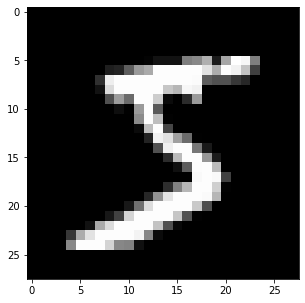

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [22]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        ## encoder ##
        self.encoder = nn.Linear(784, encoding_dim)
        ## decoder ##
        self.decoder = nn.Linear(encoding_dim, 784)

    def forward(self, x):
        # define feedforward behavior 
        # and scale the *output* layer with a sigmoid activation function
        
        # pass x into encoder
        out = F.relu(self.encoder(x))
        # pass out into decoder
        out = torch.sigmoid(self.decoder(out))
        
        return out

# initialize the NN
encoding_dim = 64
model = Autoencoder(encoding_dim)
model = model.to(device)
print(model)

Autoencoder(
  (encoder): Linear(in_features=784, out_features=64, bias=True)
  (decoder): Linear(in_features=64, out_features=784, bias=True)
)


In [23]:
criterion = nn.MSELoss() # specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # specify optimizer function

In [25]:
%%time
# number of epochs to train the model
n_epochs = 20

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data in train_loader:
        # _ stands in for labels, here
        images, _ = data
        # flatten images
        images = images.view(images.size(0), -1)
        images = images.to(device)
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(images)
        # calculate the loss
        loss = criterion(outputs, images)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.454182
Epoch: 2 	Training Loss: 0.145932
Epoch: 3 	Training Loss: 0.112928
Epoch: 4 	Training Loss: 0.105667
Epoch: 5 	Training Loss: 0.102746
Epoch: 6 	Training Loss: 0.100951
Epoch: 7 	Training Loss: 0.099765
Epoch: 8 	Training Loss: 0.098769
Epoch: 9 	Training Loss: 0.097834
Epoch: 10 	Training Loss: 0.097146
Epoch: 11 	Training Loss: 0.096612
Epoch: 12 	Training Loss: 0.096172
Epoch: 13 	Training Loss: 0.095826
Epoch: 14 	Training Loss: 0.095511
Epoch: 15 	Training Loss: 0.095220
Epoch: 16 	Training Loss: 0.094970
Epoch: 17 	Training Loss: 0.094753
Epoch: 18 	Training Loss: 0.094556
Epoch: 19 	Training Loss: 0.094380
Epoch: 20 	Training Loss: 0.094221
CPU times: user 3min 47s, sys: 2.25 s, total: 3min 49s
Wall time: 3min 52s


In [30]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

images_flatten = images.view(images.size(0), -1)
# get sample outputs
output = model(images_flatten)
# prep images for display
images = images.numpy()

# output is resized into a batch of images
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.cpu().detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img.cpu().detach()), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)

In [32]:
a = [np.random.uniform(low=1.0, high=0.5) for i in range(2)]

In [33]:
a

[0.5827077100621747, 0.8112183032228844]

In [34]:
pwd

'/mnt/disk2/samarth/denoise-nn/notebooks'

In [35]:
cd ..

/mnt/disk2/samarth/denoise-nn


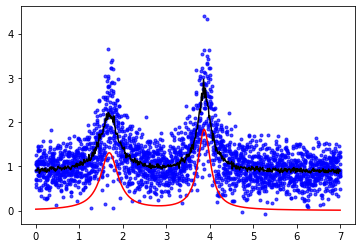

<Figure size 432x288 with 0 Axes>

In [52]:
run create-synth.py

In [75]:
def npy_loader(path):
    sample = torch.from_numpy(np.load(path))
    return sample
    

dataset = datasets.DatasetFolder(
    root='synth-data',
    loader=npy_loader,
    extensions=['.npy']#,
    #transform=transform
)

In [76]:
tload = torch.utils.data.DataLoader(dataset, batch_size=batch_size, num_workers=num_workers)
diter = iter(tload)
a, b = diter.next()